In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro, kstest
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, f_oneway
from scipy.stats import mannwhitneyu, kruskal, wilcoxon, normaltest

In [2]:
house = pd.read_csv('melb_data.csv')
house = pd.DataFrame(house)

house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [3]:
house.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

## SOAL 1
• Tampilkan statistik deskriptif pada variabel Rooms, Distance, Landsize, dan Price!

In [4]:
hdesc = house[['Rooms', 'Distance', 'Landsize', 'Price']].describe()
hdesc

,Rooms,Distance,Landsize,Price
count,13580.000000,13580.000000,13580.000000,1.358000e+04
mean,2.937997,10.137776,558.416127,1.075684e+06
std,0.955748,5.868725,3990.669241,6.393107e+05
min,1.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,6.100000,177.000000,6.500000e+05
50%,3.000000,9.200000,440.000000,9.030000e+05
75%,3.000000,13.000000,651.000000,1.330000e+06
max,10.000000,48.100000,433014.000000,9.000000e+06


## SOAL 2
• Berapa jumlah Rooms pada rumah yang harganya paling mahal?

• Berapa rata-rata harga rumah yang jarak ke CBD (variabel Distance) terdekat?

• Berapa rata-rata harga rumah yang luas tanahnya (variabel Landsize) 1 kali standar deviasi di atas rata-rata luas tanah?

• Berapa rentang (range) harga rumah (variabel Price) pada region Southern Metropolitan?

In [6]:
# BERAPA JUMLAH ROOMS DENGAN HARGA PALING MAHAL?
house[['Rooms','Price']].sort_values(by='Price', ascending=False).head(1)

,Rooms,Price
12094,3,9000000.0


Jumlah rooms dengan harga paling mahal: 3.

In [7]:
# Berapa rata-rata harga rumah yang jarak ke CBD (variabel Distance) terdekat?

house0 = house[house['Distance']==0].sort_values(by='Distance', ascending=True)
house0
house0[['Price']].mean()

Price    671166.666667
dtype: float64

Rata-rata harga rumah yang jarak ke CBD (variabel Distance) terdekat: 671166.666667


In [8]:
#Berapa rata-rata harga rumah yang luas tanahnya (variabel Landsize) 1 kali standar deviasi di atas rata-rata luas tanah?
# 1xSTD 

## MEAN LANDSIZE
hmean = hdesc['Landsize']['mean']
hmean

558.4161266568483

In [11]:
## STD LANDSIZE

hstd = hdesc['Landsize']['std']
hstd

3990.6692411090344

In [14]:
housemean = house[house['Landsize']>hstd+hmean]
housemean[['Price']].mean()

Price    880776.666667
dtype: float64

Rata-rata harga rumah yang luas tanahnya (variabel Landsize) 1 kali standar deviasi di atas rata-rata luas tanah: 880776.666667

In [9]:
#Berapa rentang (range) harga rumah (variabel Price) pada region Southern Metropolitan?
smmax = house[(house['Regionname']=='Southern Metropolitan')]['Price'].max()
smmin = house[(house['Regionname']=='Southern Metropolitan')]['Price'].min()
print(smmax-smmin)

7869000.0


Rentang (range) harga rumah (variabel Price) pada region Southern Metropolitan: 7869000.0


## SOAL 3

• Nilai outlier adalah nilai yang berada di bawah Q1 - (1.5 * IQR) atau di atas Q3 + (1.5 * IQR)

• Hitung Q1, Q2, dan IQR pada kolom Price (harga rumah).

• Hitung ada berapa nilai outlier pada kolom Price!

In [10]:
hprice = house[['Price']].describe()
hprice
hprice['Price']['75%']

1330000.0

In [16]:
q3 = hprice['Price']['75%']
q2 = hprice['Price']['50%']
q1 = hprice['Price']['25%']
iqr = q3-q1
ub = q3+1.5*iqr
lb = q1-1.5*iqr

print('Q3: ', q3)
print('Q2: ', q2)
print('Q1: ', q1)
print('IQR: ', iqr)
print('UB: ', ub)
print('LB: ', lb)

Q3:  1330000.0
Q2:  903000.0
Q1:  650000.0
IQR:  680000.0
UB:  2350000.0
LB:  -370000.0


In [17]:
# Hitung ada berapa nilai outlier pada kolom Price!
# DAFTAR OUTLIER: 612 kolom
house[(house['Price']>ub)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,4/03/2017,3.3,3206.0,...,2.0,0.0,211.0,198.0,1890.0,Port Phillip,-37.84810,144.94990,Southern Metropolitan,3280.0
92,Albert Park,2 Dundas Pl,3,h,2615000.0,S,Cayzer,10/12/2016,3.3,3206.0,...,2.0,1.0,177.0,181.0,1880.0,Port Phillip,-37.84150,144.95850,Southern Metropolitan,3280.0
97,Albert Park,70 Barrett St,3,h,2575000.0,S,Greg,15/10/2016,3.3,3206.0,...,2.0,1.0,228.0,NaN,NaN,Port Phillip,-37.84450,144.95010,Southern Metropolitan,3280.0
102,Albert Park,97 Page St,3,h,3010000.0,S,Greg,18/03/2017,3.3,3206.0,...,2.0,0.0,147.0,146.0,1890.0,Port Phillip,-37.84730,144.95510,Southern Metropolitan,3280.0
103,Albert Park,55 Withers St,4,h,2800000.0,VB,Cayzer,18/06/2016,3.3,3206.0,...,3.0,1.0,327.0,254.0,1910.0,Port Phillip,-37.84670,144.94750,Southern Metropolitan,3280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13521,Port Melbourne,44 Garton St,4,t,2455000.0,SP,Marshall,26/08/2017,3.5,3207.0,...,3.0,2.0,123.0,0.0,2010.0,NaN,-37.83349,144.94840,Southern Metropolitan,8648.0
13523,Prahran,69 Greville St,4,h,2668000.0,S,Biggin,26/08/2017,4.6,3181.0,...,2.0,2.0,383.0,NaN,NaN,NaN,-37.84879,144.98882,Southern Metropolitan,7717.0
13553,Surrey Hills,20 Albert Cr,4,h,2720000.0,S,Kay,26/08/2017,10.2,3127.0,...,3.0,2.0,1005.0,NaN,1920.0,NaN,-37.82421,145.10352,Southern Metropolitan,5457.0
13555,Surrey Hills,3 Oak St,4,h,3100000.0,VB,Marshall,26/08/2017,10.2,3127.0,...,2.0,3.0,832.0,NaN,NaN,NaN,-37.83564,145.10919,Southern Metropolitan,5457.0


## SOAL 4
• Lakukan uji asumsi normalitas pada variabel harga rumah (Price) menggunakan:

• Shapiro Wilk Test.

• D'Agostino / Pearson's Test.

In [71]:
price = house['Price']

SHAPIRO TESTING

In [72]:
# SHAPIRO TESTING
# stat, p_value = shapiro(price)
# print('stat: ', stat)
# print('p value: ', p_value)

sha = shapiro(price)
# print('stat: ', sha.statistic)
# print('p-value: ', sha.pvalue)


c:\Users\Public\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [70]:
if sha.pvalue < 0.05:
    print('Tolak H0: H1: sampel berdistribusi tidak normal.')
else:
    print('Terima H0: sampel berdistribusi normal.')

Tolak H0


In [76]:
#PEARSON-D'AGOSTINO'S TESTING
pda = normaltest(price)
pda.pvalue

0.0

In [74]:
if pda.pvalue < 0.05:
    print('Tolak H0: H1: sampel berdistribusi tidak normal.')
else:
    print('Terima H0: sampel berdistribusi normal.')

Tolak H0: H1: sampel berdistribusi tidak normal.


PEMBERSIHAN OUTLIER JIKA DISTRIBUSI TIDAK NORMAL

In [77]:
hclean = house[(house['Price']<=ub)]

In [78]:
hclean

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,3049.0,...,2.0,2.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,Northern Metropolitan,2474.0
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0


In [98]:
hclean.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

## SOAL 5
Jika Diasumsikan telah memenuhi syarat statistik parametrik, hitung seberapa kuat korelasi variabel Rooms dengan Price, serta arah korelasinya!

In [26]:
roomprice = hclean[['Rooms', 'Price']].corr()
roomprice

,Rooms,Price
Rooms,1.000000,0.486273
Price,0.486273,1.000000


In [58]:
roomprice = hclean[['Rooms', 'Price']].corr()
corrrp = roomprice.loc['Rooms','Price']
corrrp

0.486272971026826

ROOM PRICE MEMPUNYAI KORELASI POSITIF.

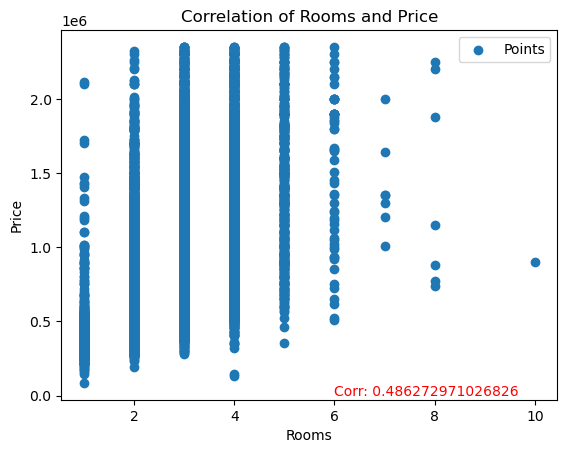

In [59]:
#COEFFICIENT SEARCH

plt.scatter(hclean['Rooms'], hclean['Price'], label='Points')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Correlation of Rooms and Price')
plt.text(6,180, f'Corr: {corrrp}', fontsize=10, color='red')
plt.legend()
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

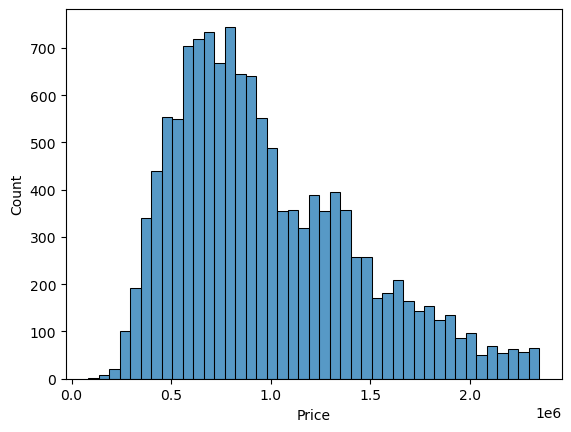

In [22]:
sns.histplot(hclean['Price'])

## SOAL 6

• Dari beberapa Regionname, manakah Regionname yang variabel jumlah kamarnya (Rooms) memiliki korelasi terkuat dengan variabel harga rumah
(Price)!

• Diasumsikan telah memenuhi syarat statistik parametrik.

In [107]:
roomprice = hclean[['Rooms', 'Price']]
roomprice
# corrrp = roomprice.loc['Rooms','Price']
# corrrp

,Rooms,Price
0,2,1480000.0
1,2,1035000.0
2,3,1465000.0
3,3,850000.0
4,4,1600000.0
...,...,...
13574,3,582000.0
13575,4,1245000.0
13576,3,1031000.0
13577,3,1170000.0


In [109]:
coef = roomprice.corr()
coef

,Rooms,Price
Rooms,1.000000,0.486273
Price,0.486273,1.000000


In [113]:
most_correlating_row = coef.loc['Rooms'].idxmax()


In [114]:
print(roomprice.loc[most_correlating_row])


KeyError: 'Rooms'

In [63]:
np.argmax(np.abs(corrrp))
# REGION NAME: NORTHERN METROPOLITAN

0

## SOAL 7
Jika Diasumsikan TIDAK memenuhi syarat statistik parametrik, hitung seberapa kuat korelasi variabel Distance dengan Price, serta arah korelasinya!

In [29]:
distanceprice = house[['Distance', 'Price']].corr()
corrdp = distanceprice.loc['Distance','Price']
corrdp

-0.16252183786382476

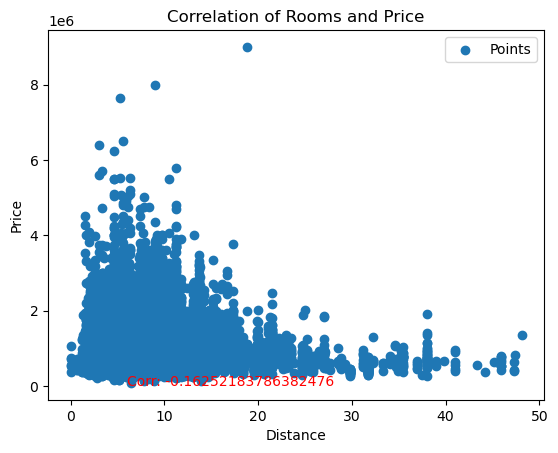

In [30]:
plt.scatter(house['Distance'], house['Price'], label='Points')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.title('Correlation of Rooms and Price')
plt.text(6,180, f'Corr: {corrdp}', fontsize=10, color='red')
plt.legend()
plt.show()

## SOAL 8
• Dari beberapa Regionname manakah Regionname yang variabel jumlah jarak ke CBD (Distance) paling tidak berkorelasi dengan variabel harga rumah (Price)!

• Serta tampilkan juga Regionname yang paling berkorelasi kedua variabel ini!

• Diasumsikan telah memenuhi syarat statistik parametrik.

In [40]:
pricedistance = house[['Price', 'Distance']].corr()
corrpd = pricedistance.loc['Price','Distance']
corrpd

-0.16252183786382476

In [41]:
house.iloc[np.argmax(np.abs(corrpd))]


Suburb                      Abbotsford
Address                   85 Turner St
Rooms                                2
Type                                 h
Price                        1480000.0
Method                               S
SellerG                         Biggin
Date                         3/12/2016
Distance                           2.5
Postcode                        3067.0
Bedroom2                           2.0
Bathroom                           1.0
Car                                1.0
Landsize                         202.0
BuildingArea                       NaN
YearBuilt                          NaN
CouncilArea                      Yarra
Lattitude                     -37.7996
Longtitude                    144.9984
Regionname       Northern Metropolitan
Propertycount                   4019.0
Name: 0, dtype: object

In [56]:
house.iloc[np.argmin(np.abs(corrpd))]

Suburb                      Abbotsford
Address                   85 Turner St
Rooms                                2
Type                                 h
Price                        1480000.0
Method                               S
SellerG                         Biggin
Date                         3/12/2016
Distance                           2.5
Postcode                        3067.0
Bedroom2                           2.0
Bathroom                           1.0
Car                                1.0
Landsize                         202.0
BuildingArea                       NaN
YearBuilt                          NaN
CouncilArea                      Yarra
Lattitude                     -37.7996
Longtitude                    144.9984
Regionname       Northern Metropolitan
Propertycount                   4019.0
Name: 0, dtype: object

## SOAL 9
• Uji hipotesis apakah metode pembelian/Method berkaitan dengan tipe rumah/Type (dependen) atau tidak saling berkaitan (independen)!

• Hipotesis yang diuji yaitu

• Ho: kedua variabel tidak berkaitan atau independen

• Ha: kedua variabel berkaitan atau dependen

Karena Method dan tipe rumah merupakan string, kita harus menggunakan Mann-Whitney U test untuk menguji apakah dua variabel ini saling terkait atau tidak.

In [50]:
method = hclean['Method']
type = hclean['Type']

In [53]:
hclean['Method'].isna().sum()

0

In [54]:
hclean['Type'].isna().sum()

0

In [55]:
y = mannwhitneyu(hclean['Method'], hclean['Type'], alternative='two-sided')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## SOAL 10

• Uji hipotesis apakah rata-rata harga rumah (Price) antar Regionname berbeda ataukah sama! Diasumsikan persyaratan statistik parametrik terpenuhi

• Hipotesis yang diuji yaitu:

• Ho: rata-rata harga rumah antar Regionname sama

• Ha: setidaknya ada satu pasang Regionname yang rata-rata harga rumahnya tidak sama, tapi kita tidak tahu yang mana

In [57]:
house['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [97]:
nmm = hclean[hclean['Regionname']=='Northern Metropolitan']['Price']
wmm = hclean[hclean['Regionname']=='Western Metropolitan']['Price']
smm = hclean[hclean['Regionname']=='Southern Metropolitan']['Price']
emm = hclean[hclean['Regionname']=='Eastern Metropolitan']['Price']
sem = hclean[hclean['Regionname']=='South-Eastern Metropolitan']['Price']
evm = hclean[hclean['Regionname']=='Eastern Victoria']['Price']
nvm = hclean[hclean['Regionname']=='Northern Victoria']['Price']
wvm = hclean[hclean['Regionname']=='Western Victoria']['Price']


In [98]:
# IS THERE A DIFFERENCE OF PRICE BETWEEN REGIONS?
z = f_oneway(nmm, wmm, smm, emm, sem, evm, nvm, wvm)

In [99]:
if z[1] < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

Tolak H0


Dengan ini hipotesis menandakan terdapat ada satu pasang Regionname dengan mean Price yang sama, sekalipun tidak diketahui yang mana.